In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/volkswagen-ad/volkswagen_ad.mp4
/kaggle/input/car-brand-logos/Car_Brand_Logos/README.txt
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc83.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc59.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc22.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc74.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/Otomobilport.com_.tr_.Mercedes.logo_.yildiz.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/r6.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc40.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc45.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc68.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc44.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc51.jpg
/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/r4.jpg
/kaggle/input/car-brand-l

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

2024-06-02 17:56:23.164166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 17:56:23.164327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 17:56:23.320609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Paths to your custom dataset
train_dir = '/kaggle/input/car-brand-logos/Car_Brand_Logos/Train'
test_dir = '/kaggle/input/car-brand-logos/Car_Brand_Logos/Test'

# Define class names and corresponding label indices
class_names = ['hyundai', 'lexus', 'mazda', 'mercedes', 'opel', 'skoda', 'toyota', 'volkswagen']
class_to_label = {class_name: i for i, class_name in enumerate(class_names)}


# Function to load and preprocess images with explicit labeling
def load_and_preprocess_data(directory):
    images = []
    labels = []
    for brand in os.listdir(directory):
        brand_dir = os.path.join(directory, brand)
        for image_file in os.listdir(brand_dir):
            image_path = os.path.join(brand_dir, image_file)
            image = Image.open(image_path).convert('L').resize((28, 28))  # Resize images to 28x28 and convert to grayscale
            image = img_to_array(image) / 255.0  # Convert to numpy array and normalize pixel values
            images.append(image)
            labels.append(class_to_label[brand])  # Assign label based on mapping
    return images, labels

# Load and preprocess train and test data
train_images, train_labels = load_and_preprocess_data(train_dir)
test_images, test_labels = load_and_preprocess_data(test_dir)

In [4]:
# Convert labels to categorical
train_labels = to_categorical(train_labels, num_classes=8)
test_labels = to_categorical(test_labels, num_classes=8)

# Convert lists to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)


In [5]:
print(train_labels.shape)
print(test_labels.shape)

(2513, 8)
(400, 8)


In [6]:
# Build the CNN model
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(8, activation='softmax')
# ])

# Define the model with dropout and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=100, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.1370 - loss: 2.2778 - val_accuracy: 0.0000e+00 - val_loss: 2.6233
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1329 - loss: 2.2084 - val_accuracy: 0.0000e+00 - val_loss: 3.0247
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1522 - loss: 2.1587 - val_accuracy: 0.0000e+00 - val_loss: 2.8343
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1490 - loss: 2.1198 - val_accuracy: 0.0000e+00 - val_loss: 2.7907
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1805 - loss: 2.0857 - val_accuracy: 0.0000e+00 - val_loss: 3.2530
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1870 - loss: 2.0633 - val_accuracy: 0.0000e+00 - val_loss: 3.1319
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2377 - loss: 1.9940 - val_accuracy: 0.0000e+00 - val_loss: 2.9870
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2618 - los

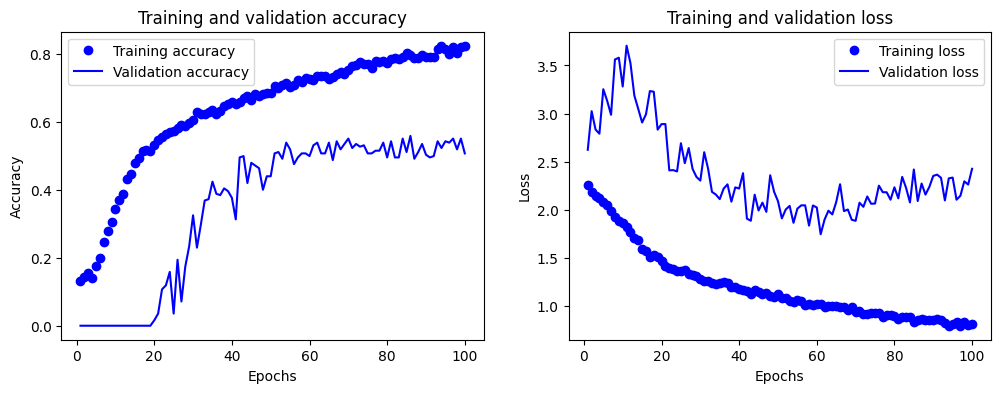

In [8]:
# Plot the training and validation accuracy and loss
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def preprocess_image(image_path):
    # Load image and resize
    image = Image.open(image_path).convert('L').resize((28, 28))  # Resize images to 28x28 and convert to grayscale
    # Convert to numpy array
    image = img_to_array(image)
    # Add batch dimension and channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image



# Function to predict logo
def predict_logo(model, image_path, class_names):
    # Preprocess image
    image = preprocess_image(image_path)
    # Make prediction
    predictions = model.predict(image)
    # Get predicted class index
    predicted_class_index = np.argmax(predictions[0])
    # Get predicted class name
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

# Example usage
image_path = '/kaggle/input/car-brand-logos/Car_Brand_Logos/Test/mercedes/mrc44.jpg'  # Replace with the path to your image
predicted_logo = predict_logo(model, image_path, class_names)
print("Detected logo:", predicted_logo)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Detected logo: mercedes
